# TP 1 - Time Series
__2271.3 Acquisition des données__

Le dataset fourni vous présente la variation de 5 variables (_Temperature_, _Humidity_, _Light_, _CO2_, _HumidityRatio_) dans une pièce en relation au fait qu’une pièce soit occupé par une personne ou pas (variable _Occupancy_).

Une possible tâche d’analyse serait de pouvoir prédire la variable _Occupancy_ en connaissant une ou plusieurs des autres informations.

Dans ce travail pratique, nous nous limitons à une exploration des ces données et une analyse statistique simple. 


Remarques :
- **Les reponses aux questions doivent être justifiées avec du code**
- Vous pouvez ajouter d'autres cellules

# A corriger
- Exercice 0
- Exercice 1
- Exercice 2
- Exercice 3
- Exercice 4  
   Sauf le dernier point: Discutez vos résultats (encore à faire)

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exercice 0 - Préparation et exploration des données
- Charger le dataset fourni dans le dossier "data" avec la date comme index
- Quel est la plage horaire totale couverte par le dataset ?
- Quelle est la taille du dataframe (nombre de lignes et de colonnes) ?

In [2]:
df = pd.read_csv("data/data.csv", sep=";")

# The date is a string, convert it to a datetime object
df.Date = pd.to_datetime(df.Date)
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)

df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Date,,,,,,
2015-02-04 17:51:00,23.180,27.272000,426.0,721.250000,0.004793,1
2015-02-04 18:01:00,23.075,27.150000,419.0,690.250000,0.004741,1
2015-02-04 18:10:59,22.890,27.390000,0.0,689.500000,0.004730,0
2015-02-04 18:21:00,22.700,27.463333,0.0,668.666667,0.004688,0
2015-02-04 18:30:59,22.600,27.445000,0.0,655.000000,0.004656,0
...,...,...,...,...,...,...
2015-02-10 08:51:00,20.500,33.722500,407.5,495.500000,0.005034,1
2015-02-10 09:01:00,20.675,33.975000,419.0,527.750000,0.005127,1
2015-02-10 09:10:59,20.790,34.972500,433.0,631.000000,0.005317,1


In [3]:
df.index[0] - df.index[-1]

Timedelta('-6 days +08:20:01')

In [4]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 815
Number of columns: 6


# Exercice 1:
- Plotter chaque colonnes du dataset
- Quelles sont selon vous les colonnes les plus corrélées avec "Occupancy", en regardant les graphes ?

## Plotter chaque colonnes du dataset

On plot tout sur le même graphique, le problème est les ordre de grandeur qui ne correspondent pas du tout

<AxesSubplot:xlabel='Date'>

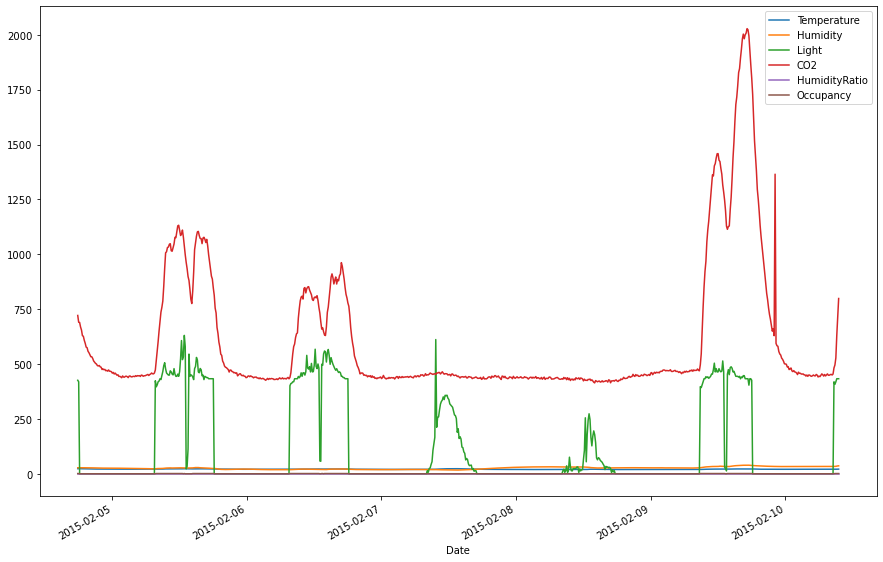

In [5]:
df.plot(figsize=(15, 10))

On plot alors les valeurs sur différents graphiques afin de palier au problème d'ordre de grandeur afin déterminer quelles sont les valeurs les plus corrélées

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

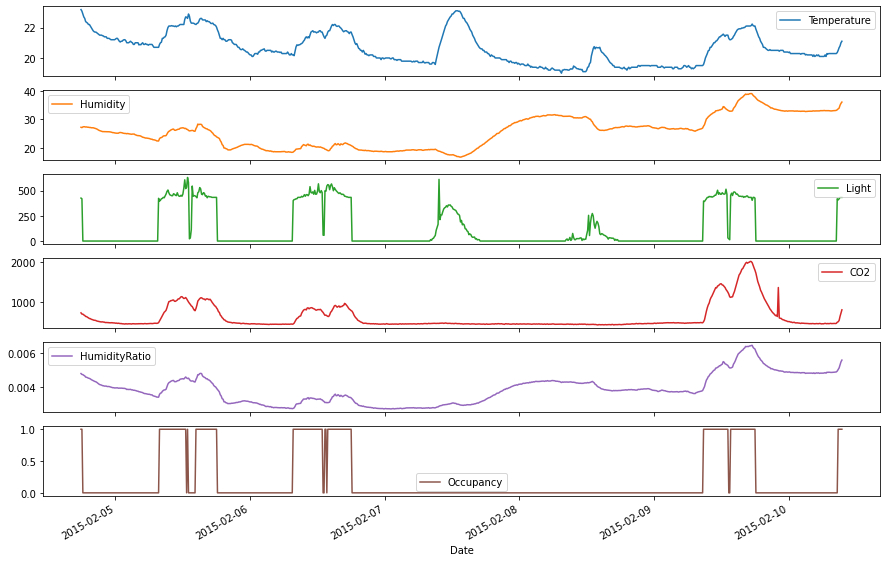

In [6]:
df.plot(figsize=(15, 10), subplots=True)

## Quelles sont selon vous les colonnes les plus corrélées avec "Occupancy", en regardant les graphes ?
D'après les graphiques `Occupancy` est corrélée dans l'ordre:
1. `Light` (très bonne corrélation)
2. `CO2` (plutôt bien corrélé)
3. `HumidityRatio` (vaguement corrélé)
4. `Temperature` (faible corrélation)
5. `Humidity` (faible corrélation)

# Exercice 2:
- Calculer les corrélations entre les colonnes du dataset.
    - Les afficher sous format numériques et sous format de heatmap (les deux en même temps, c'est-à-dire sous format de heatmap avec les valeurs numériques est accepté)
- Est-ce que les corrélations numériques correspondent à votre prédiction à l'exercice précédent ?
- Discuter les résultats

## Calculer les corrélations entre les colonnes du dataset

In [7]:
df_corr = df.corr()
df_corr

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141647,0.650878,0.557622,0.152529,0.538024
Humidity,-0.141647,1.000000,0.034676,0.440922,0.955008,0.129282
Light,0.650878,0.034676,1.000000,0.659735,0.227844,0.907280
CO2,0.557622,0.440922,0.659735,1.000000,0.627776,0.712446
HumidityRatio,0.152529,0.955008,0.227844,0.627776,1.000000,0.297194
Occupancy,0.538024,0.129282,0.907280,0.712446,0.297194,1.000000


## Les afficher sous format numériques et sous format de heatmap

<AxesSubplot:>

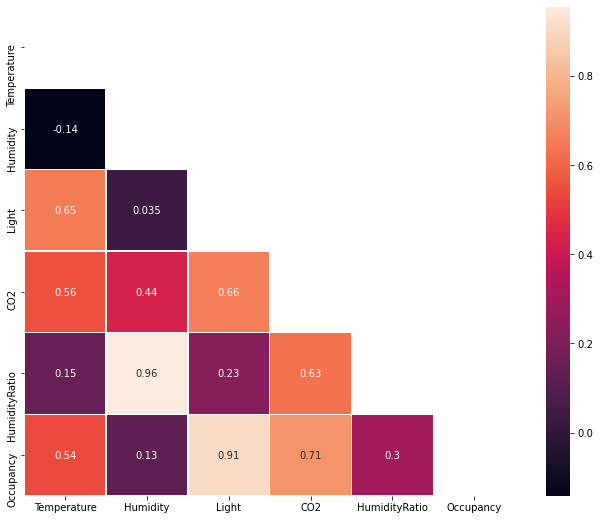

In [8]:
f, ax = plt.subplots(figsize=(11, 9))

# Remove upper triangle, it's not needed
mask = np.triu(np.ones_like(df_corr , dtype=bool))

sns.heatmap(df_corr, mask=mask, annot=True,  linewidths=.5)

## Est-ce que les corrélations numériques correspondent à votre prédiction à l'exercice précédent ?
A l'exercice précédent j'ai classé les corrélation par rapport à mon interprétation des graphique, ce qui donnait:

D'après les graphiques `Occupancy` est corrélée dans l'ordre:
  1. `Light` (très bonne corrélation)
  2. `CO2` (plutôt bien corrélé)
  3. **`HumidityRatio` (vaguement corrélé)**
  4. **`Temperature` (faible corrélation)**
  5. `Humidity` (faible corrélation)

En remplaçant mes interprétation qualitative ordinale par les valeurs numérique quantitative continue, on a:

`Occupancy`:
  1. `Light` (91%)
  2. `CO2` (71%)
  3. **`Temperature` (50%)**
  4. **`HumidityRatio` (30%)**
  5. `Humidity` (13%)
  
Mes prédiction était donc plutôt correctes, mais j'ai inversé `HumidityRatio` et `Temperature` car la corrélation sur les graphiques devenait difficile à déceler à ce niveau.

## Discuter vos résultats
`Occupancy`:
  1. `Light` (91%)  
   Quand la pièce est occupée les personnes allument la lumière

  2. `CO2` (71%)  
   Quand la pièce est occupée les personnes rejetent du CO2 en respirant
  
  3. `Temperature` (50%)  
   Quand la pièce est occupée les personnes la chauffe avec leur température corporelle
  
  4. `HumidityRatio` (30%)  
   Quand la pièce est occupée les personnes l'humidifie en transpirant ou respirant mais faiblement

  5. `Humidity` (13%)  
   La corrélation est négligeable, on peut pas vraiment faire de lien avec `Occupancy`

# Exercice 3:
- Afficher les boxplots par colonne et par jour, avec un graphe par colonne.
   - Vous devriez avoir une graphe avec un boxplot par jour pour la première colonne, puis un graphe avec un boxplot par jour pour la seconde colonne, etc.
- Expliquer ce que signifie le boxplot (les différentes barres et les points)

## Afficher les boxplots par colonne et par jour, avec un graphe par colonne

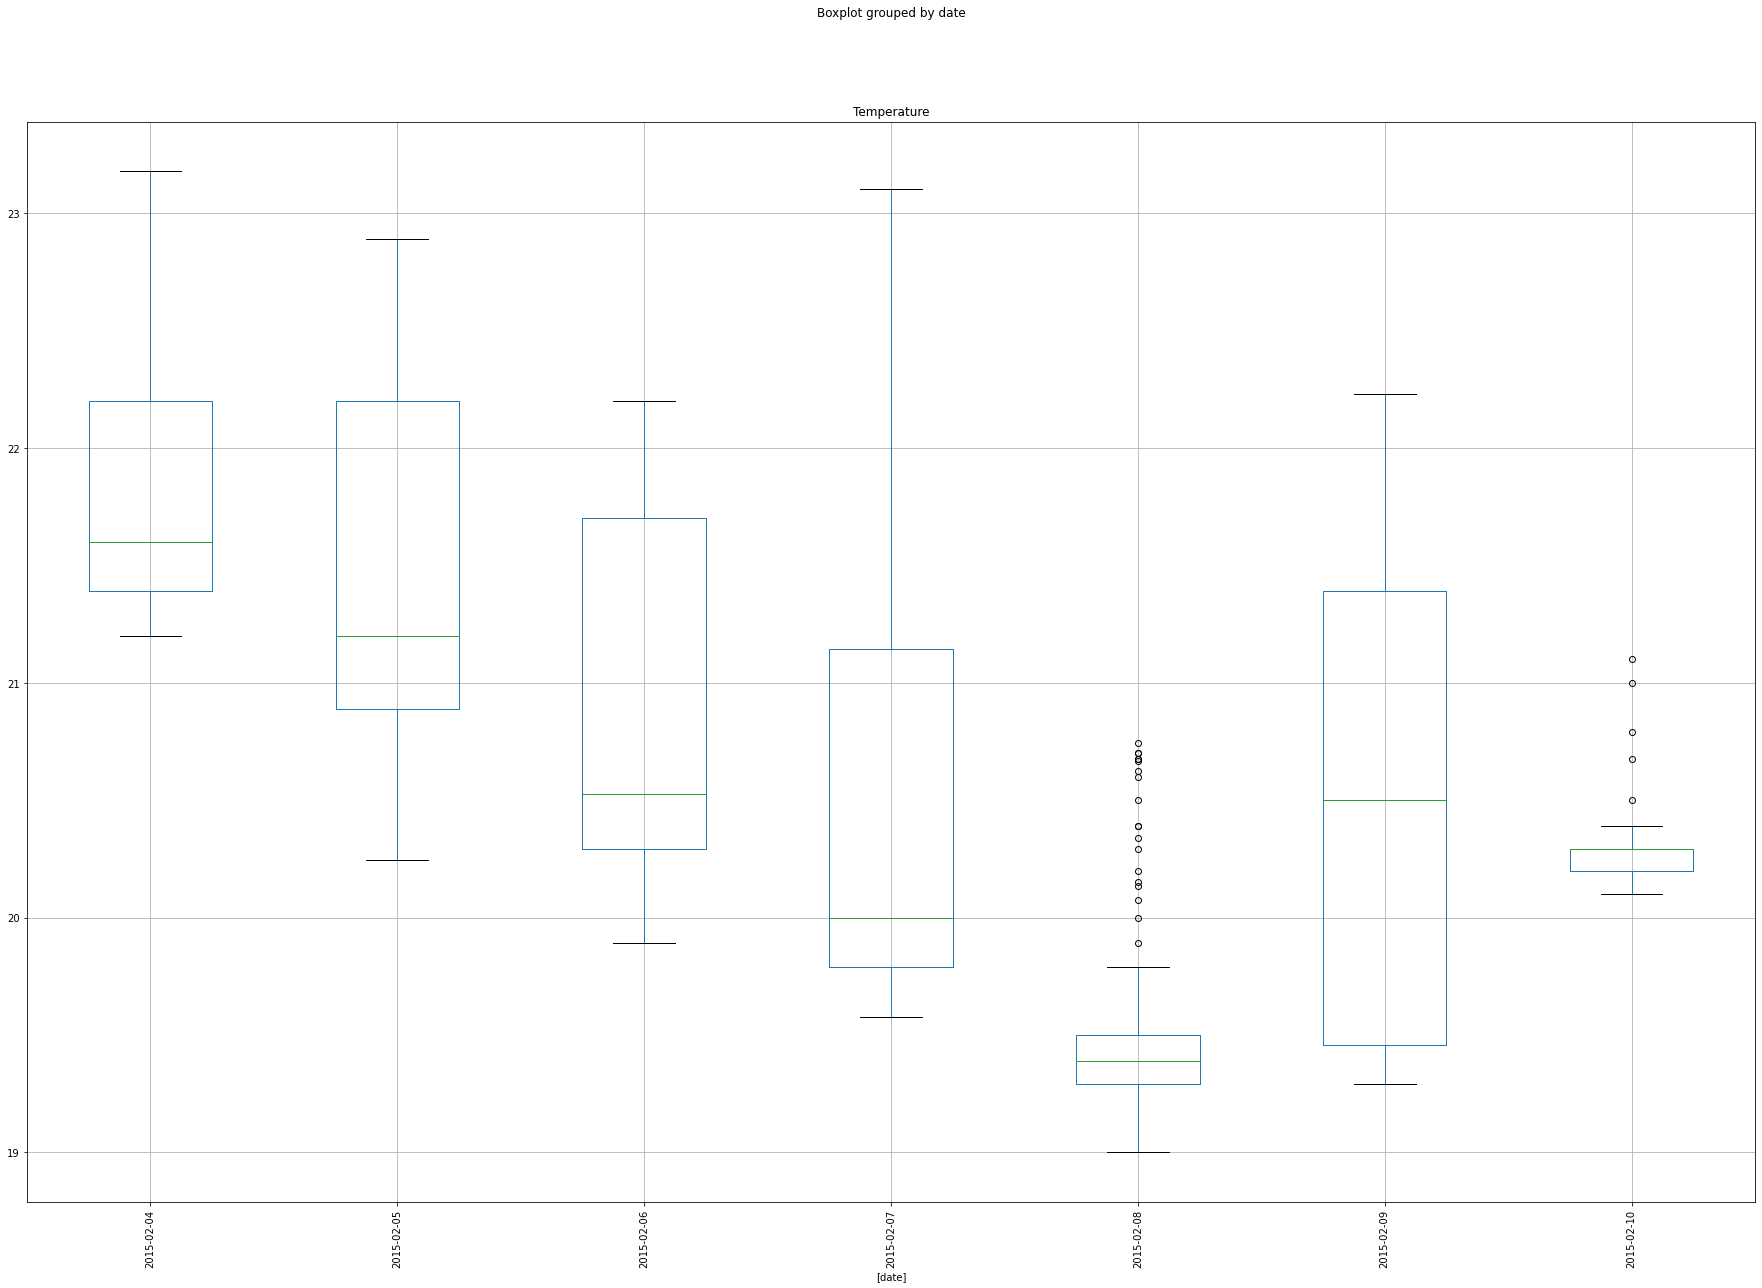

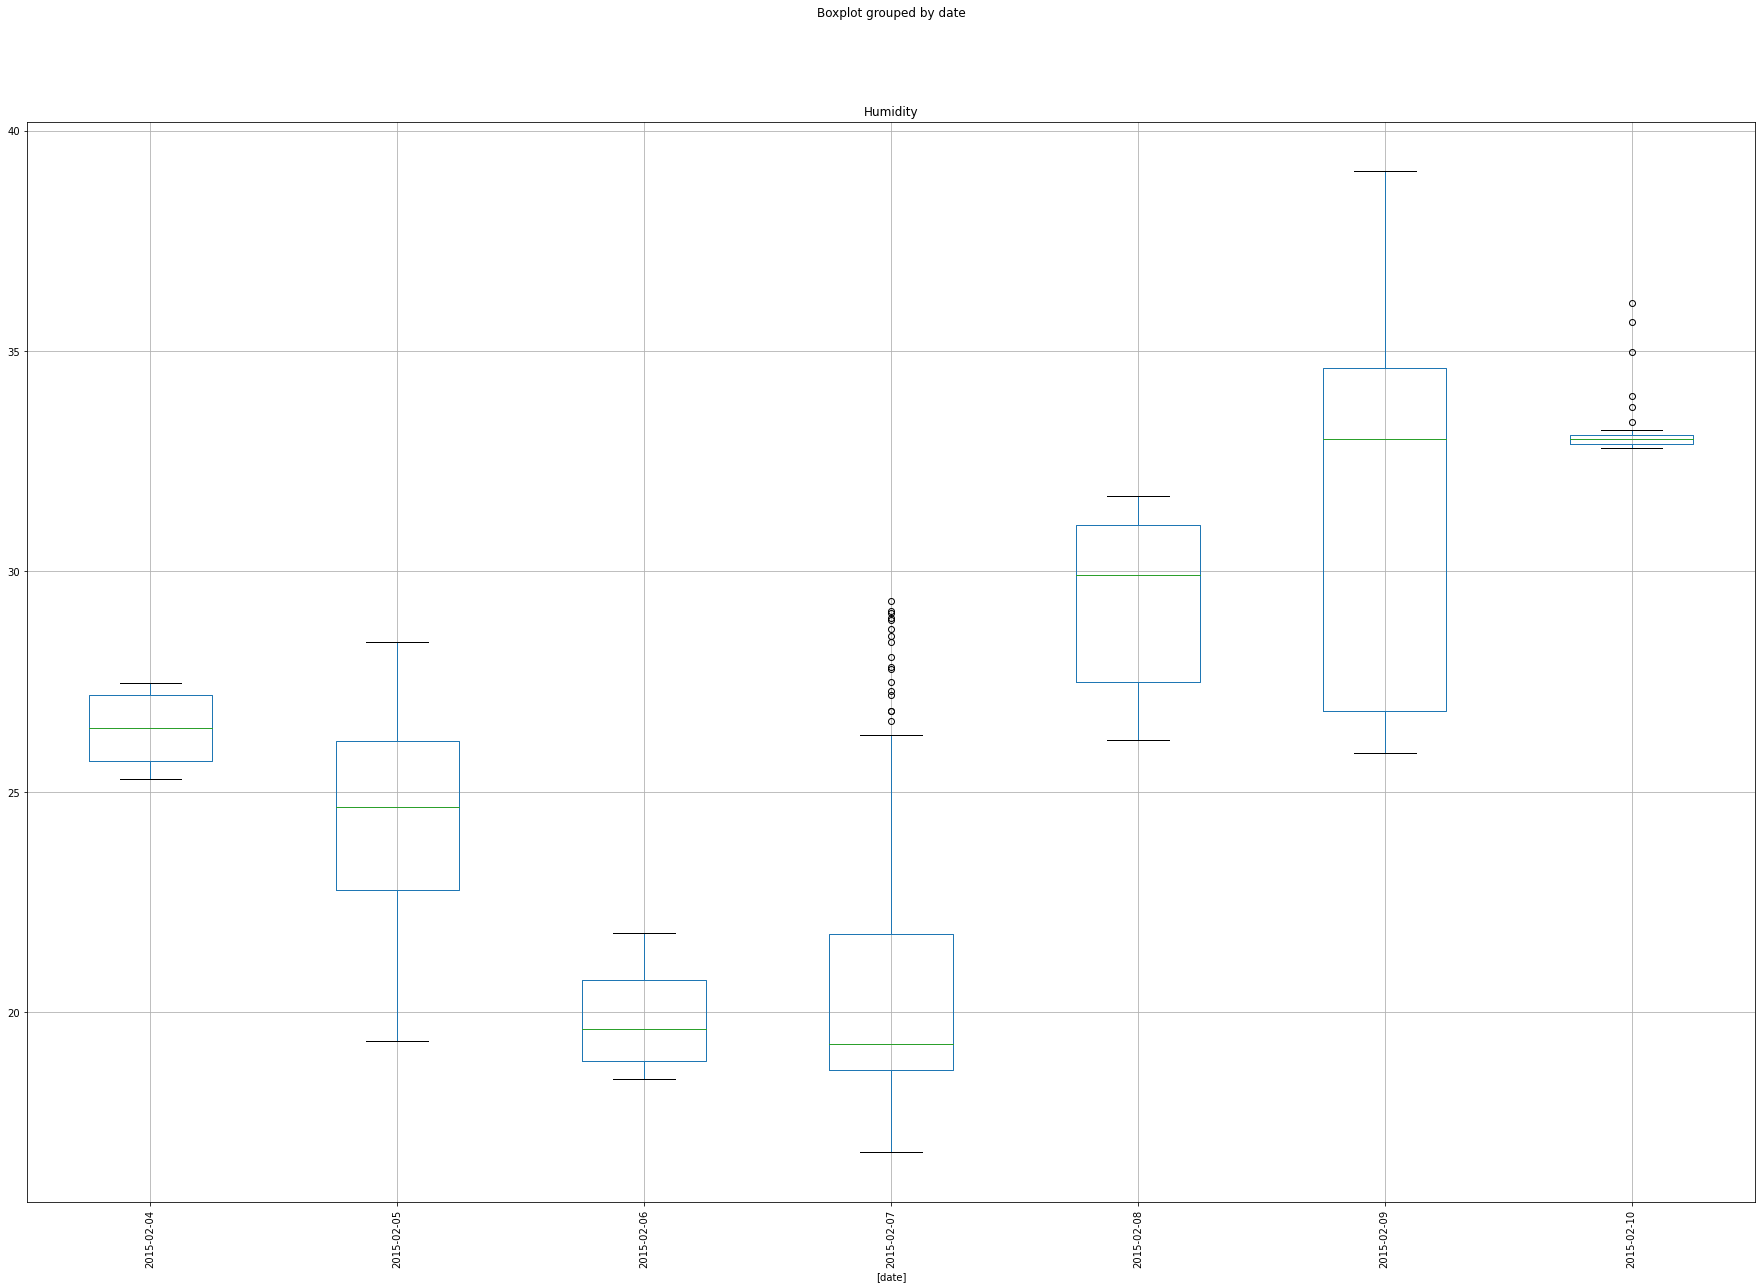

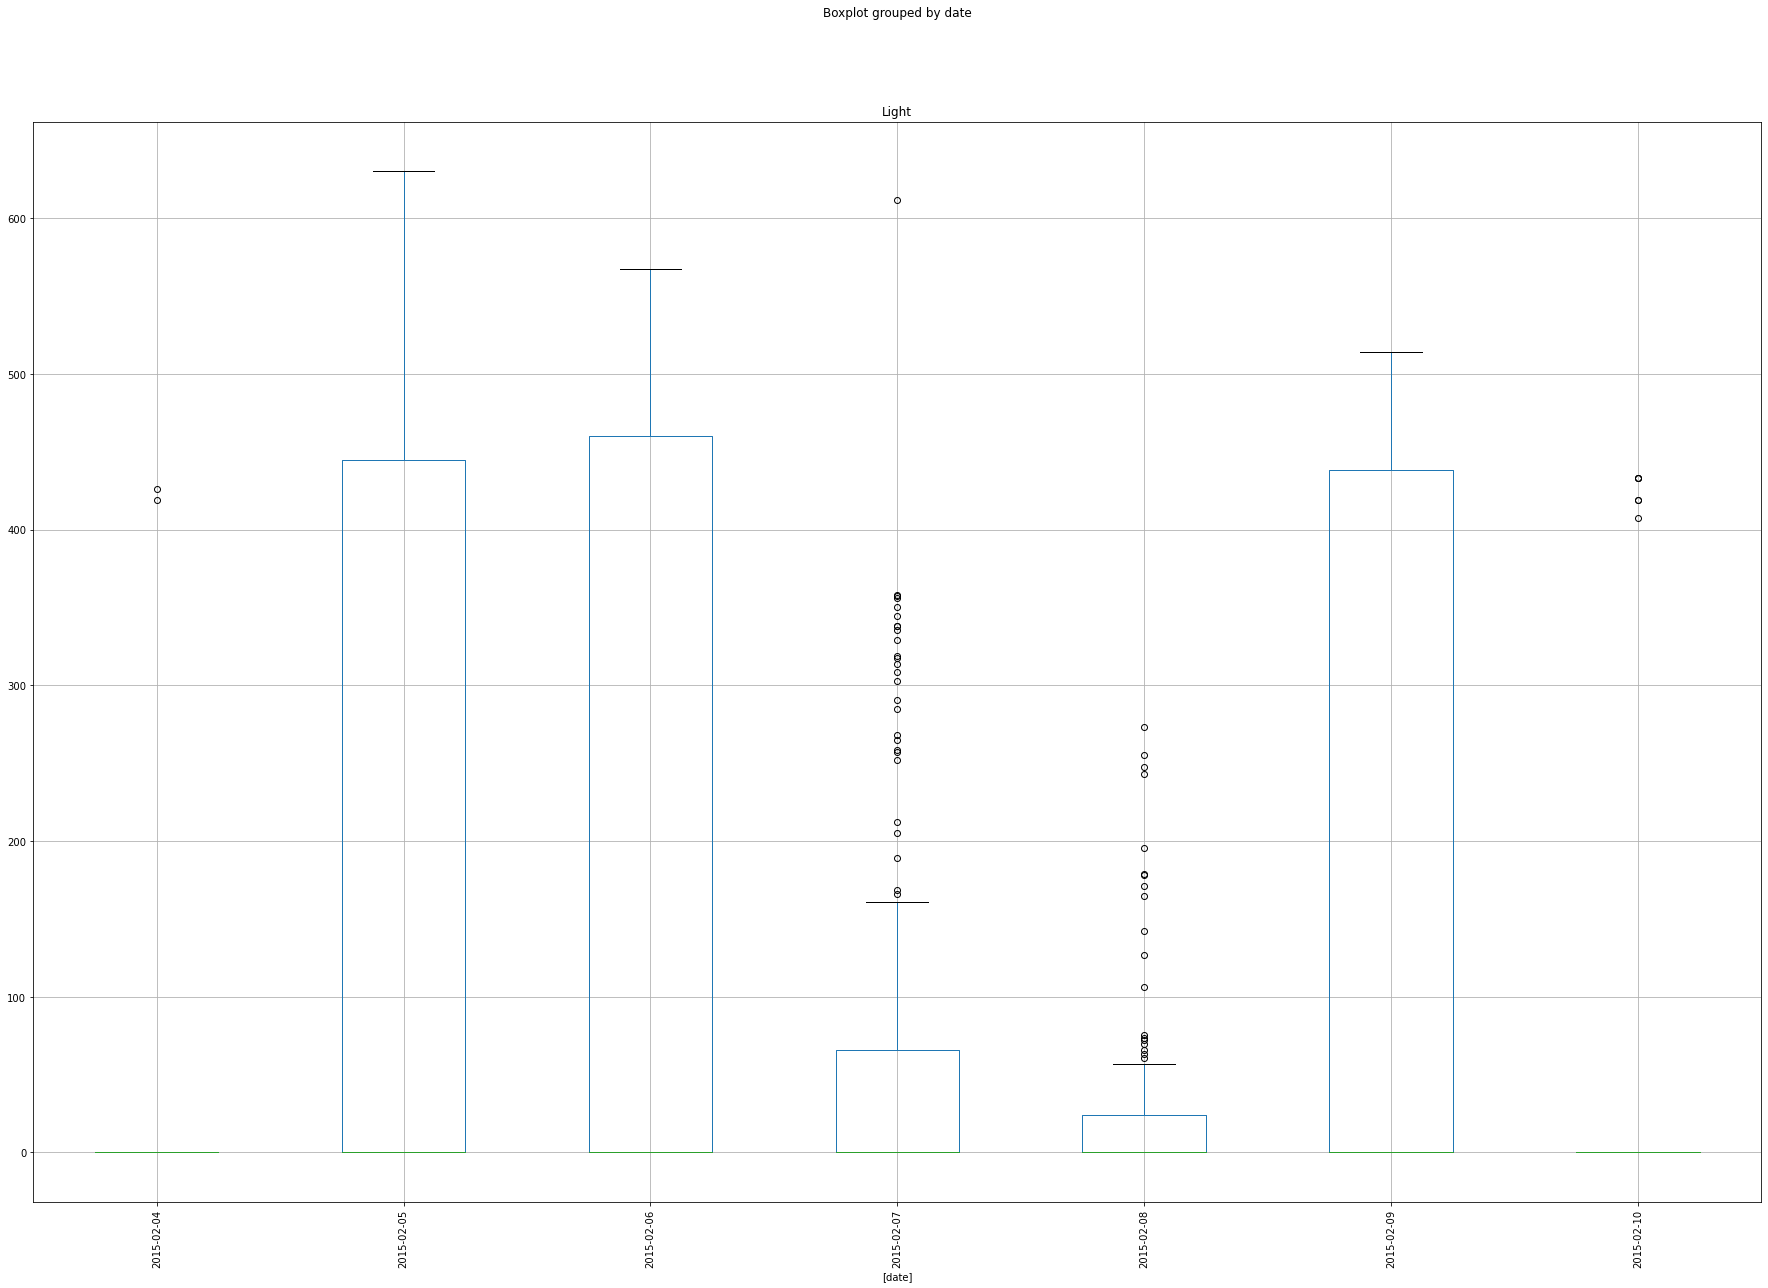

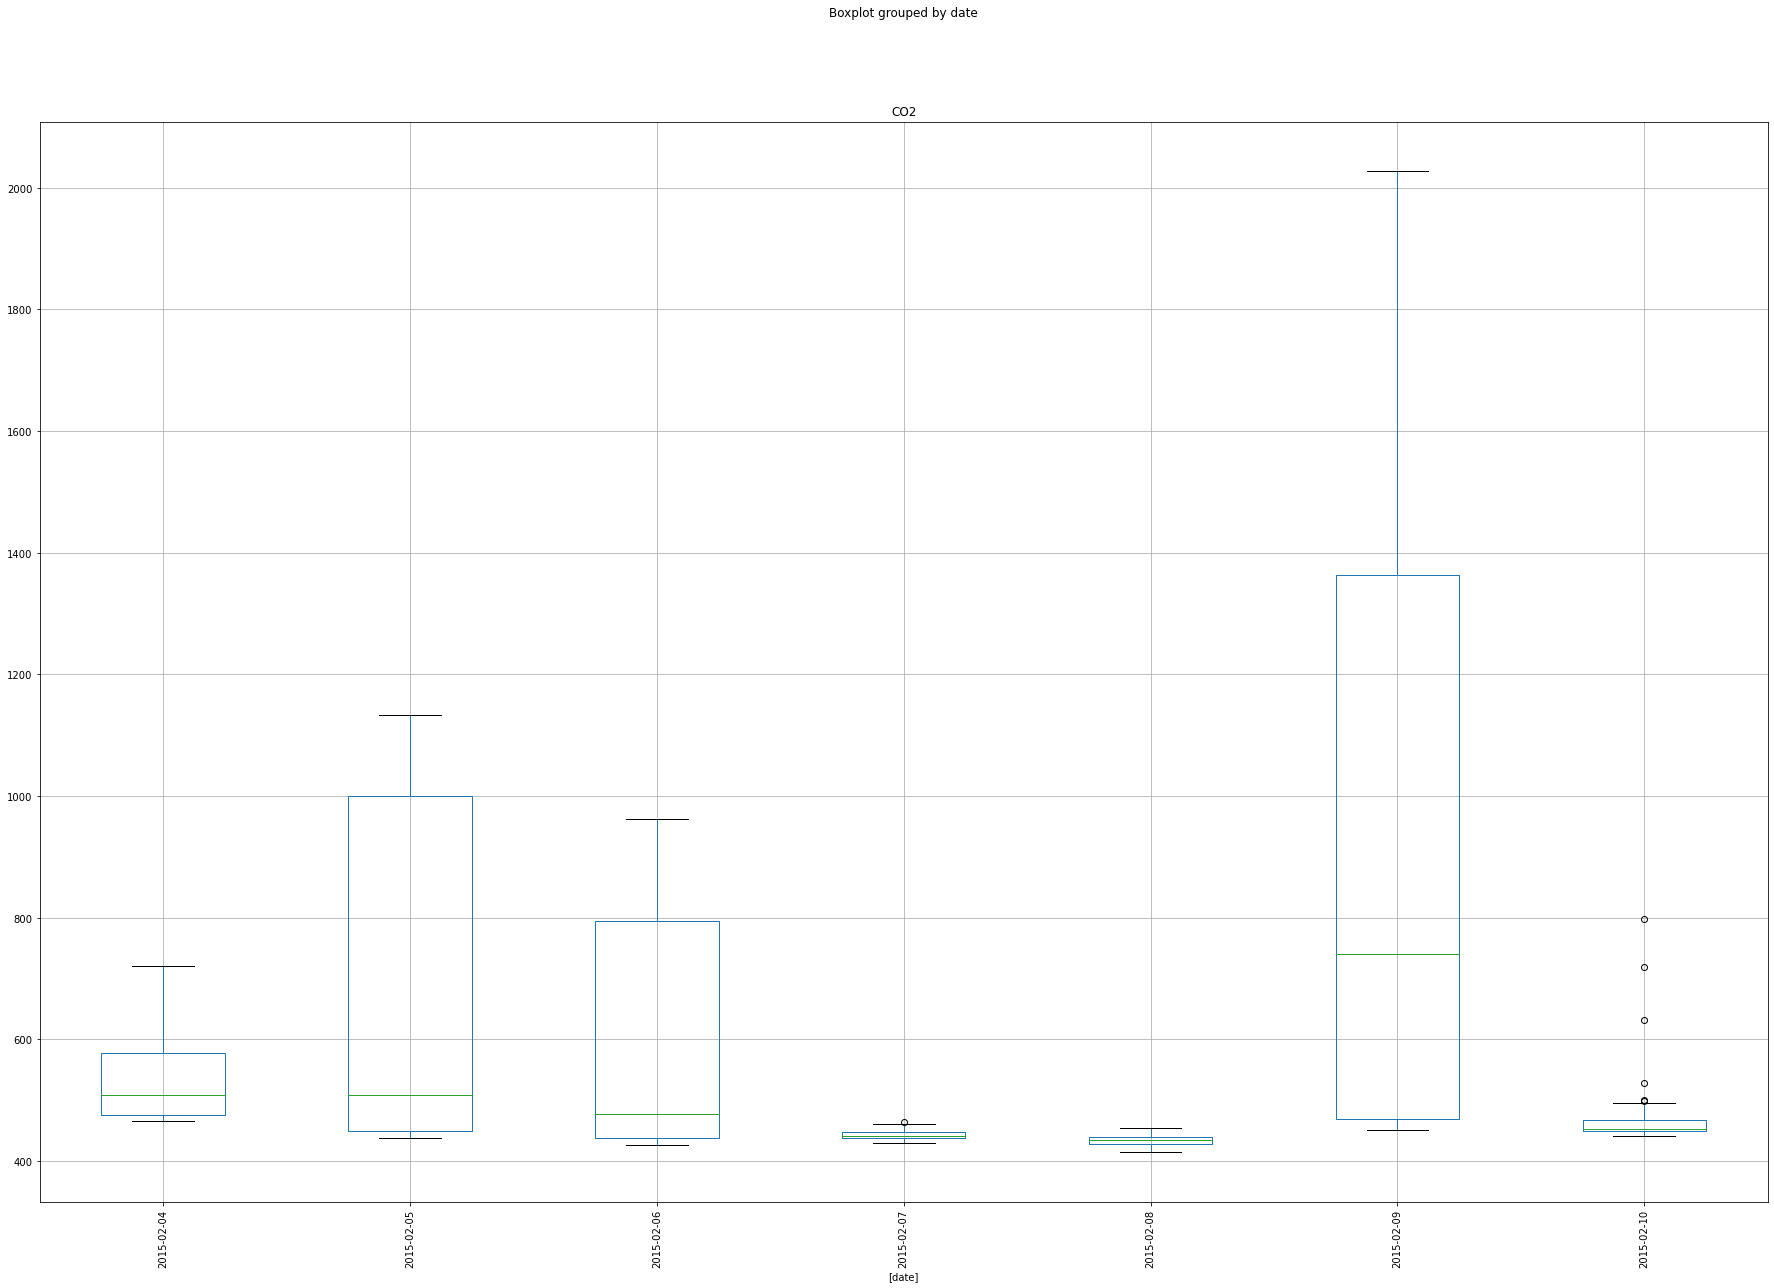

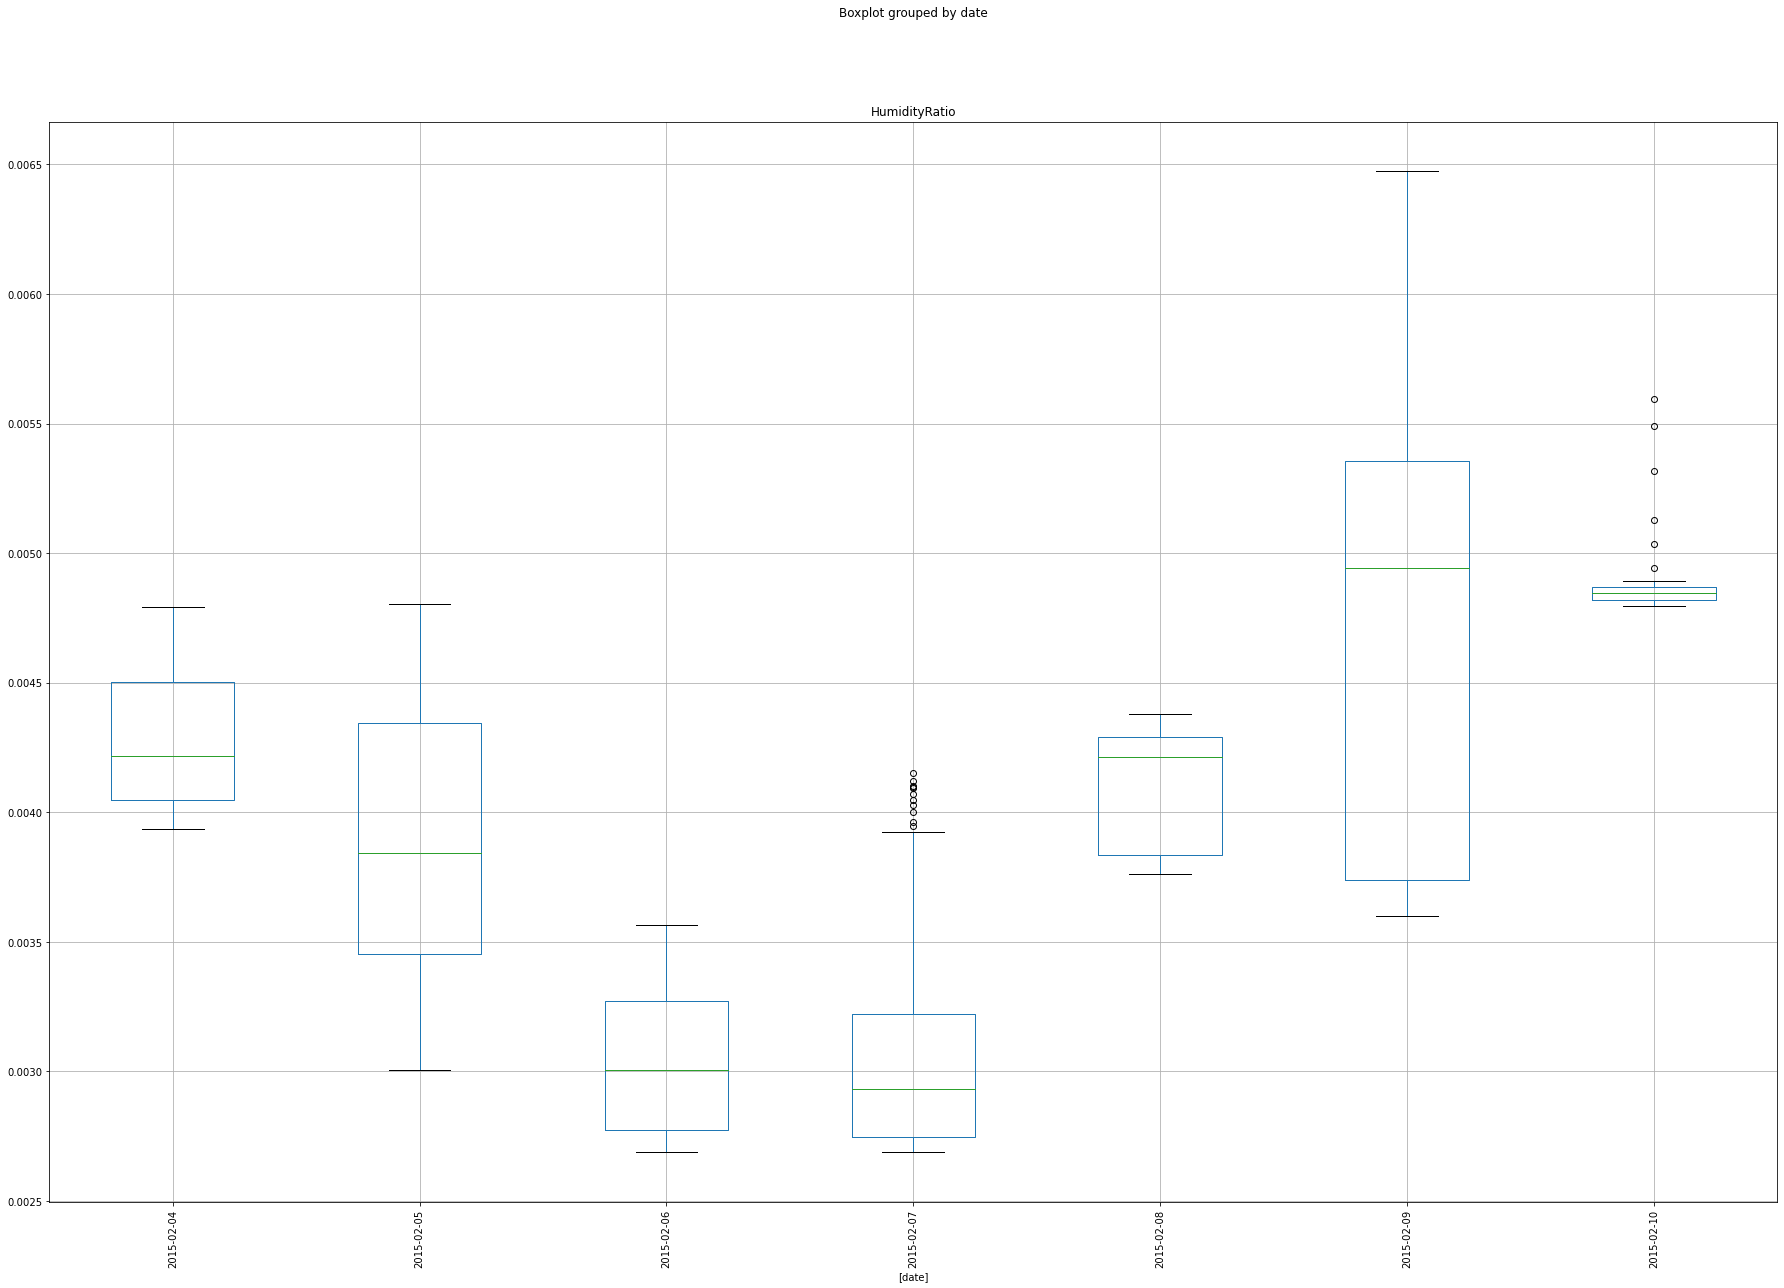

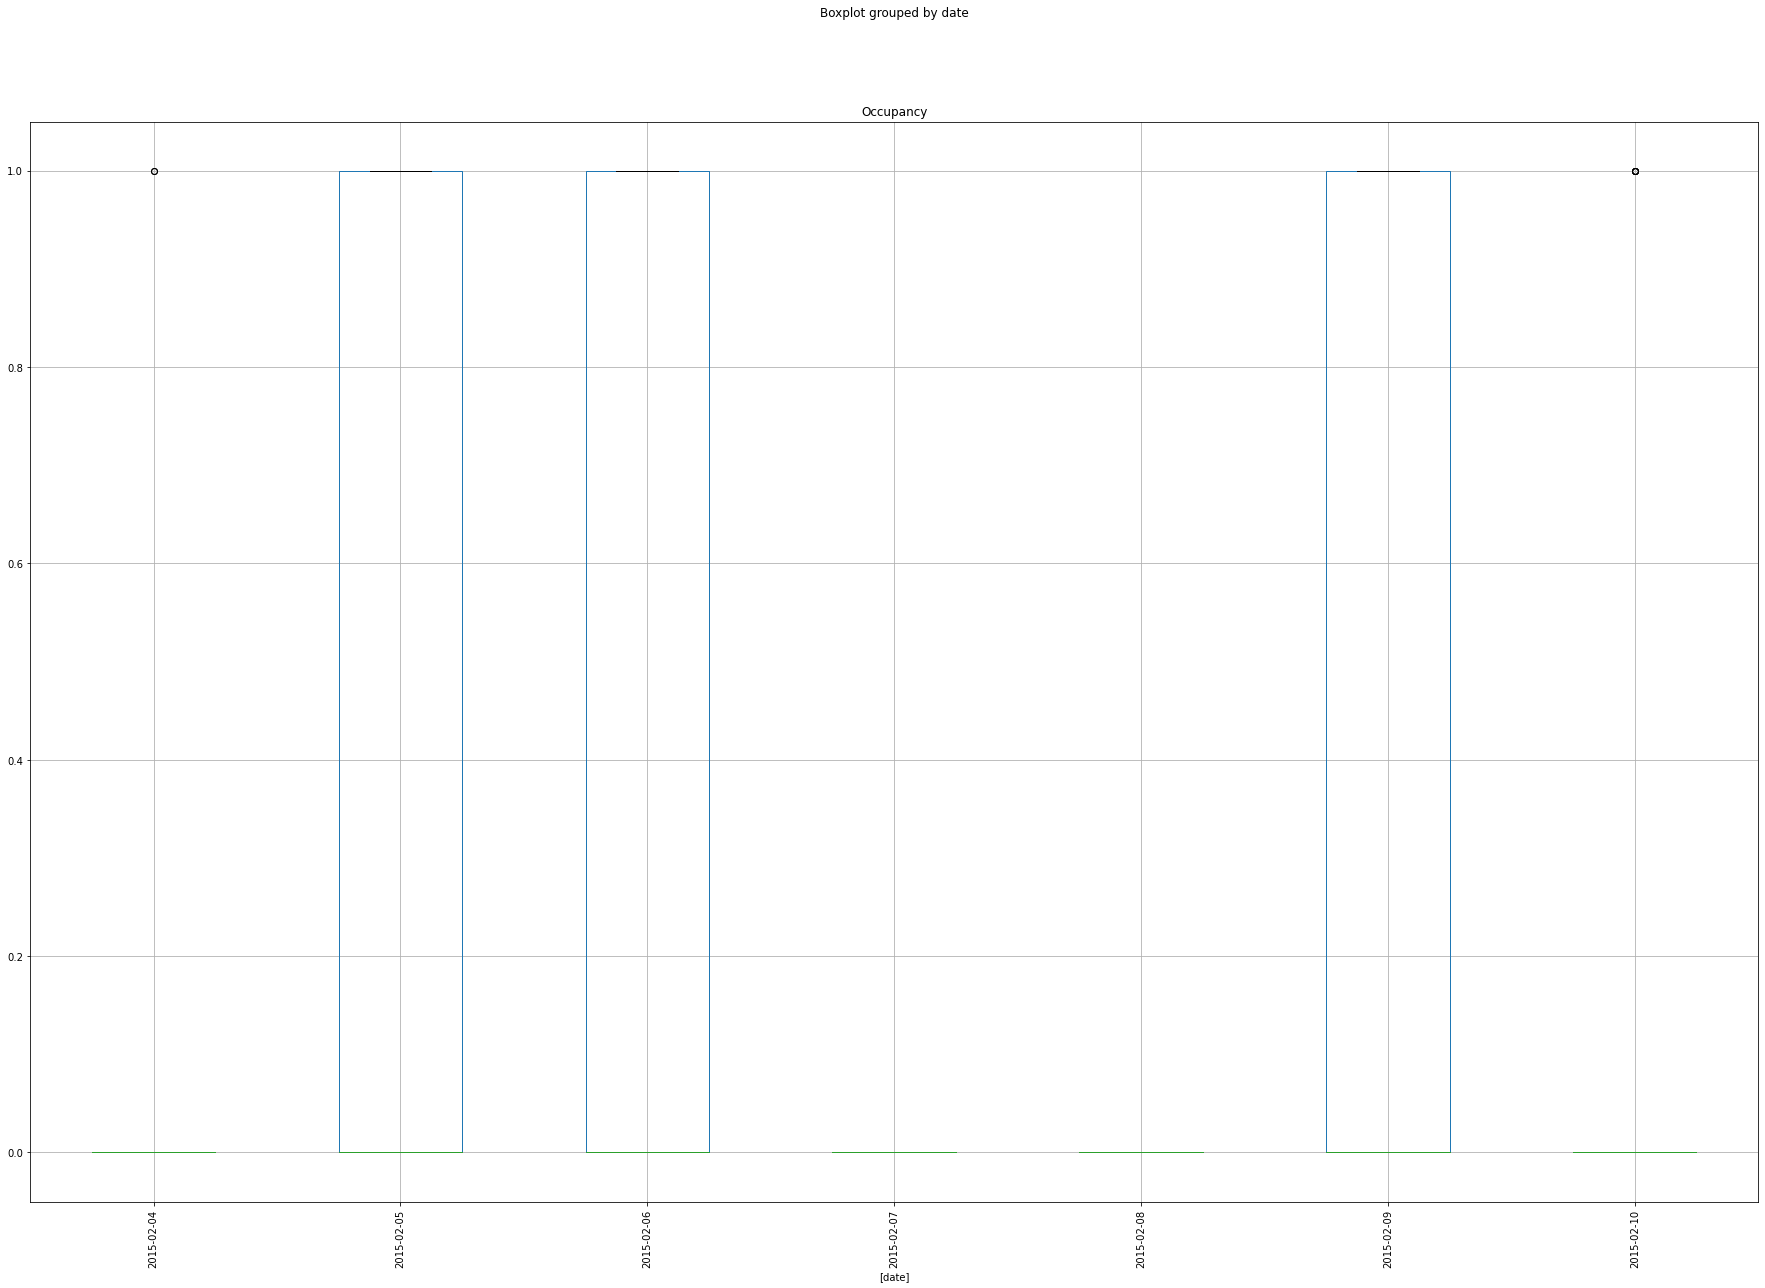

In [9]:
# We do not care about the time of the day, only the date of the day
df_boxplot = df.copy()
df_boxplot["date"] = df.index.date

# Cannot see the boxplot very well
# df_boxplot.boxplot(
#     [
#         "Temperature",
#         "Humidity",
#         "Light",
#         "CO2",
#         "HumidityRatio",
#         "Occupancy"
#     ],
#     by=["date"],
#     figsize=(30, 20),
#     rot=90
# )

for c in df.columns:
    df_boxplot.boxplot(
        [c],
        by=["date"],
        figsize=(30, 20),
        rot=90
    )

## Expliquer ce que signifie le boxplot (les différentes barres et les points)
Prenons un seul boxplot afin d'expliquer comment interpréter un boxplot, ce boxplot va se focaliser sur la totalité de des valeurs de la colonne `CO2`

<AxesSubplot:>

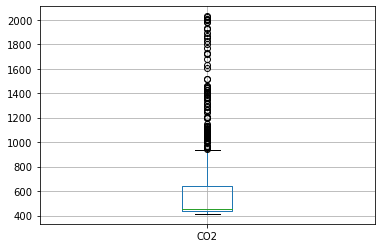

In [10]:
df.boxplot(["CO2"])

En partant du bas (0):

- Ici la barre la plus basse (~420) représente la plus petite valeur que la colonne `CO2` contient
- La deuxième barre (~450) est le premier quartile (Q1), 25% des valeurs de la colonne  `CO2` sont plus petites
- La barre verte (~475) est le deuxième quartile, donc la médiane (Q2), 50% des valeurs de la colonne  `CO2` sont plus petites et 50% sont plus grandes
- La troisième barre (~625) est le troisième quartile (Q3), 75% des valeurs de la colonne  `CO2` sont plus petites
- La quatrième barre (~950) est la valeur maximale de la colonne `CO2`
- L'étendue va de la première ligne à la dernière

Les points représente des ["données aberrantes"](https://fr.wikipedia.org/wiki/Donnée_aberrante), ce sont les valeurs de la colonne `CO2` qui sont jugés trop "distantes" des autres valeurs

# Exercice 4:
- Calculer et afficher l'auto-corrélation de chaque colonne. 
- Calculer le lag optimal non trivial pour chaque colonne (limitez votre lag maximum à ~2 jours).
- Afficher sur le même graphe chaque colonne avec la version laguée d'elle-même, avec le lag optimal obtenu précédemment.
- Discutez les résultats.

## Calculer et afficher l'auto-corrélation de chaque colonne

In [11]:
for c in df.columns:
    print(f"{c}:", df[c].autocorr())

Temperature: 0.9965527154972111
Humidity: 0.9993110513663648
Light: 0.946433416032931
CO2: 0.9903223550203588
HumidityRatio: 0.9988384010800663
Occupancy: 0.9339363169902521


## Calculer le lag optimal non trivial pour chaque colonne (limitez votre lag maximum à ~2 jours)
+ J'ai affiché le graphe du lag pour chaque colonne en plus

In [12]:
def find_optimal_lag(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    """Calculate the optimal lag for a specific column of the DataFrame"""

    # Create a dataframe with a column of 1 to N - 2 (N = number of rows)
    # 1 to N - 2 because the autocorrelation with a lag of value 0 and N - 1 is equals to 1
    # you can try: with df_corr = pd.DataFrame(np.arange(0, len(df.index) - 1), columns=["n"])
    #
    # We start at a lag value of 50 because before it's not relevant
    # and finish at 2 * 6 * 24 = 2 days (sliced by 10 minutes)
    df_corr = pd.DataFrame(np.arange(50, 2 * 6 * 24, dtype=int), columns=["lag"])

    # Apply the autocorrelation operation with a specif lag of n
    df_corr["corr_value"] = df_corr.lag.apply(lambda lag: abs(df[column_name].autocorr(lag=lag)))

    # Get the row with the maximum correlation value
    max_value = df_corr.iloc[df_corr.corr_value.idxmax()]

    df_corr.set_index("lag", inplace=True)
    return (df_corr, max_value)

In [15]:
# This Dataframe contains all the columns with their lagges version
df_lag = df.copy()

for c in df.columns:
    (df_lag_corr, optimal_lag_infos) = find_optimal_lag(df, c)
    print(f"The optimal lag for the column {c} is {optimal_lag_infos.lag} with a autocorrelation value of {optimal_lag_infos.corr_value}")
    
    # Add the lagges version of the column
    df_lag["Lagged " + c] = df[str(c)].shift(int(optimal_lag_infos.lag))

    # df_lag_corr.plot(figsize=(15, 10))

The optimal lag for the column Temperature is 287.0 with a autocorrelation value of 0.4884782538346333
The optimal lag for the column Humidity is 50.0 with a autocorrelation value of 0.7093079446300071
The optimal lag for the column Light is 143.0 with a autocorrelation value of 0.5953343916681176
The optimal lag for the column CO2 is 216.0 with a autocorrelation value of 0.2554304248765408
The optimal lag for the column HumidityRatio is 50.0 with a autocorrelation value of 0.5617294247355573
The optimal lag for the column Occupancy is 144.0 with a autocorrelation value of 0.38803248962059195


## Afficher sur le même graphe chaque colonne avec la version laguée d'elle-même, avec le lag optimal obtenu précédemment

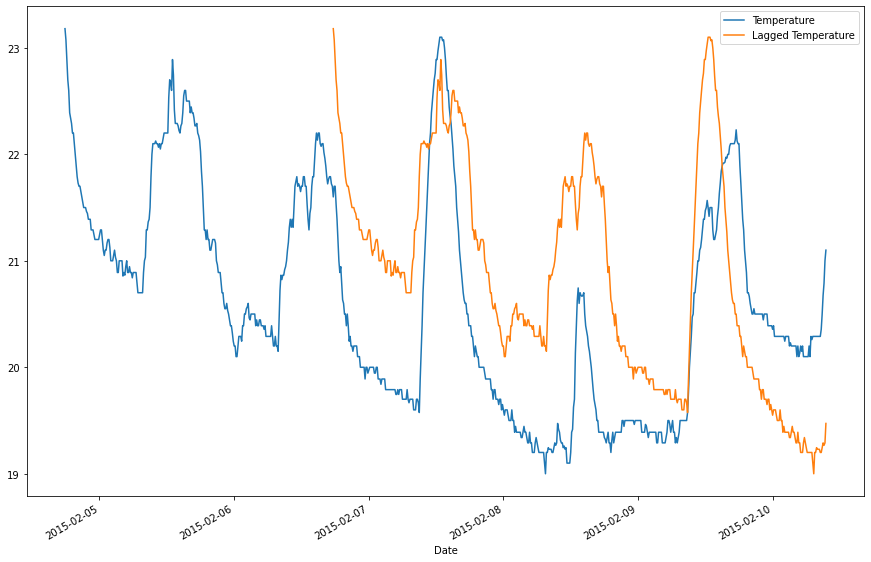

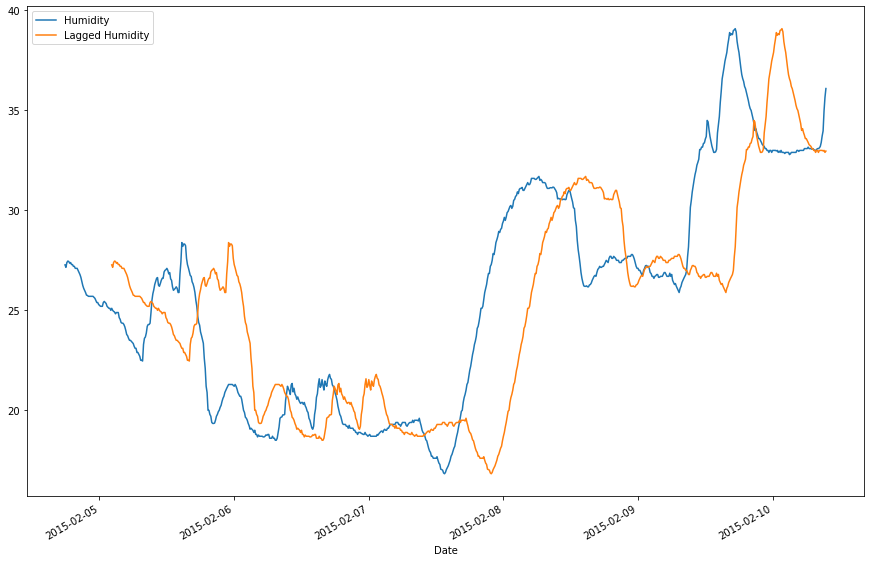

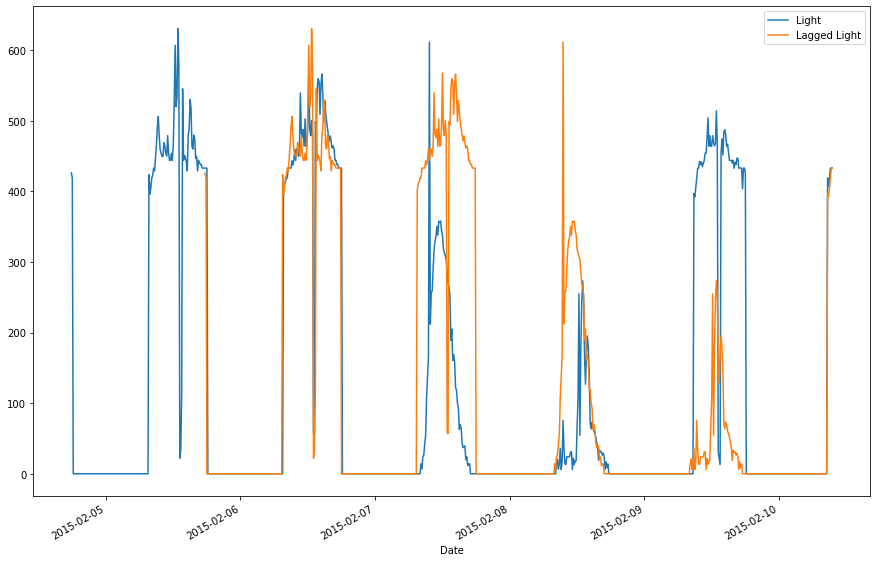

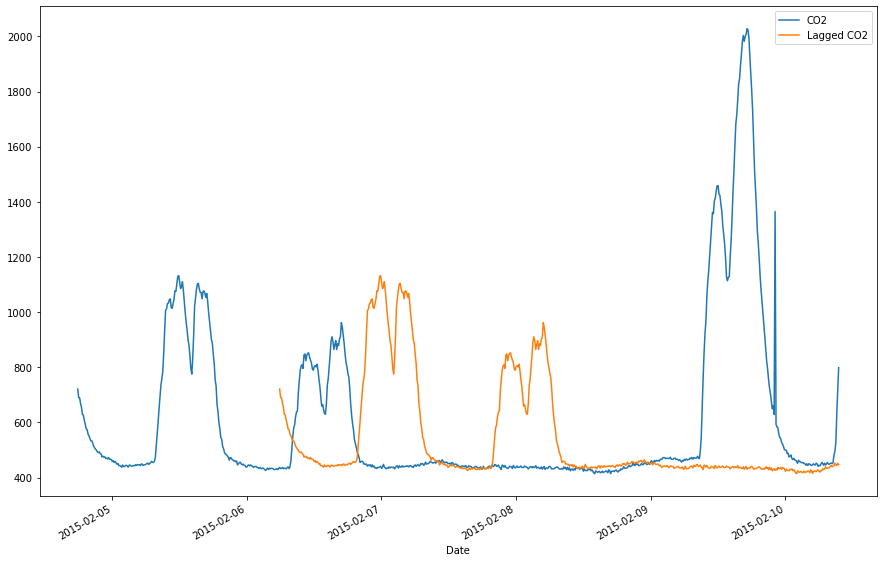

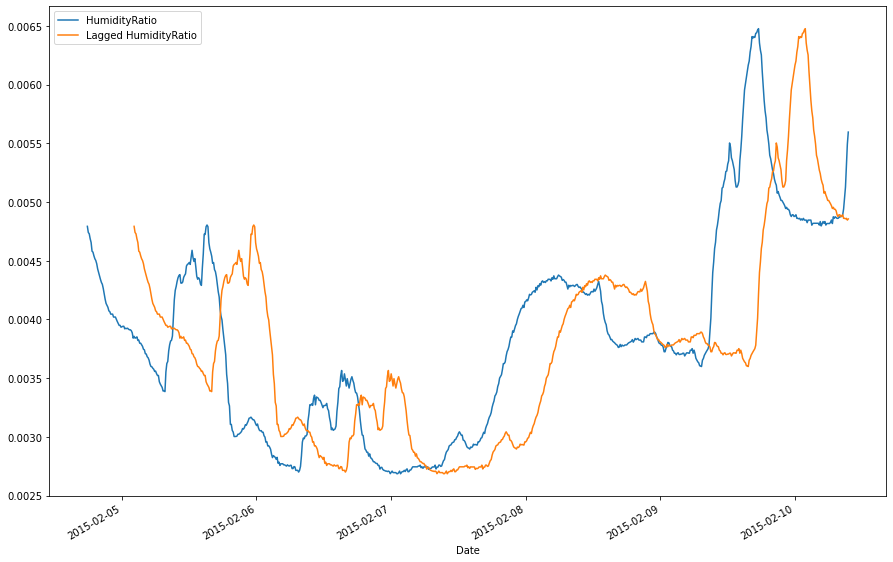

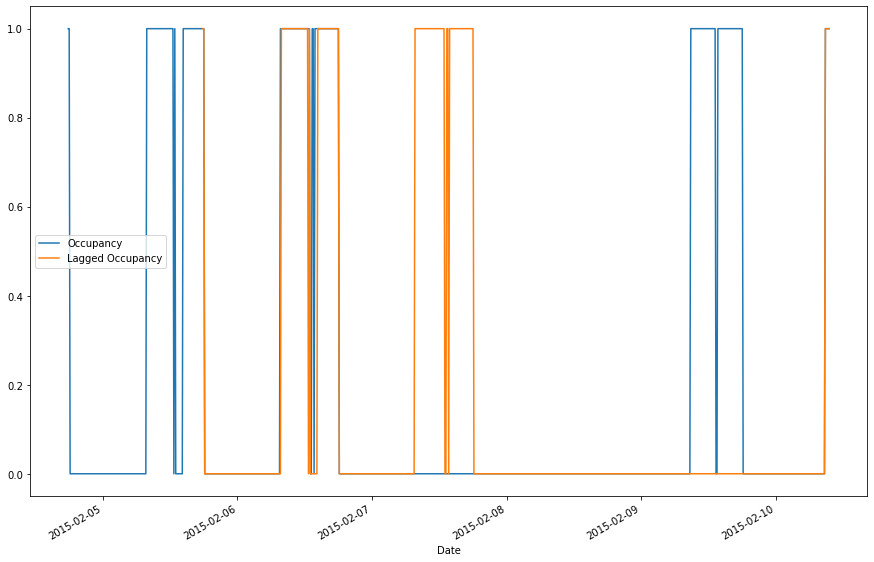

In [14]:
for c in df.columns:
    df_lag[[c, "Lagged " + c]].plot(figsize=(15, 10))

## Discutez les résultats